# **Lognormal Distribution**
The lognormal distribution of a random variable $X$ with expected value $\mu_{X}$ and standard deviation $\sigma_{X}$ is denoted $L N\left(\mu_{X}, \sigma_{X}\right)$ and is defined as
$$
f_{X}(x)=\frac{1}{\sqrt{2 \pi} \sigma_{Y}} e^{-\frac{1}{2}\left(\frac{\ln (x)-\mu_{Y}}{\sigma_{Y}}\right)^{2}}, 0<x<\infty
$$
in which $f_{X}(x)$ is the PDF of the random variable $X$, and
$$
\sigma_{Y}=\sqrt{\ln \left(\left(\frac{\sigma_{X}}{\mu_{X}}\right)^{2}+1\right)}
$$
and
$$
\mu_{Y}=\ln \left(\mu_{X}\right)-\frac{1}{2} \sigma_{Y}^{2}
$$
are the standard deviation and expected value for the normal distribution variable $y=\ln (x)$.

Source: https://www.sciencedirect.com/topics/engineering/lognormal-distribution

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ssn
import pandas as pd

In [112]:
sigma_y = (np.log((1/95)**2 + 1)) ** 0.5
mu_y = np.log(95) - 0.5 * sigma_y**2
s0 = np.random.lognormal(mu_y, sigma_y)
k1 = np.random.randint(80, 91)
k2 = np.random.randint(90, 101)
t = 365
dt = 1/t
sigma = 0.25
rf = 0.12
df = np.exp(-rf*t/365)

# Monte Carlo Simulation

In [113]:
s1 = []
s1.append(s0)
st = []
call_payoff = []
gap_payoff = []
for i in range(1000):
  s0_temp = s0
  for j in range(t):
    s = s0_temp *(1 + (rf * dt + sigma * np.random.normal()*np.sqrt(dt)))
    s0_temp = s
    if i == 0:
      s1.append(s)
  st.append(s)
  call_payoff.append(max(s-k1, 0))
  gap_payoff.append(s-k1 if s>k2 else 0)

call_price_mc = df * sum(call_payoff) / len(call_payoff)
gap_price_mc = df * sum(gap_payoff) / len(gap_payoff)


# BSM

In [114]:
d1 = (np.log(s0/k1) + (rf+sigma**2/2)) / sigma
d2 = d1 - sigma
call_price_bsm = ssn.norm.cdf(d1)*s0 - k1*np.exp(-rf)*ssn.norm.cdf(d2)

gap_price_bsm = (k2-k1)*np.exp(-rf)*ssn.norm.cdf(d2)

## a. Results as a DataFrame

In [116]:
results = pd.DataFrame(columns=['S0','K1','K2','Call Monte Carlo Price','Call BSM Price','Call Price Difeerences','Gap Monte Carlo Price','Gap BSM Price','Gap Price Differences'])
results['S0'] = [np.round(s0, 2)]
results['K1'] = [k1]
results['K2'] = [k2]
results['Call Monte Carlo Price'] = [np.round(call_price_mc, 2)]
results['Call BSM Price'] = [np.round(call_price_bsm, 2)]
results['Call Price Difeerences'] = [np.round(abs(call_price_mc - call_price_bsm), 2)]
results['Gap Monte Carlo Price'] = [np.round(gap_price_mc, 2)]
results['Gap BSM Price'] = [np.round(gap_price_bsm, 2)]
results['Gap Price Differences'] = [np.round(abs(gap_price_mc - gap_price_bsm), 2)]
results

,S0,K1,K2,Call Monte Carlo Price,Call BSM Price,Call Price Difeerences,Gap Monte Carlo Price,Gap BSM Price,Gap Price Differences
0,94.03,83,98,22.35,22.21,0.14,20.64,10.69,9.95


# b. Plot one of the simulated price path

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


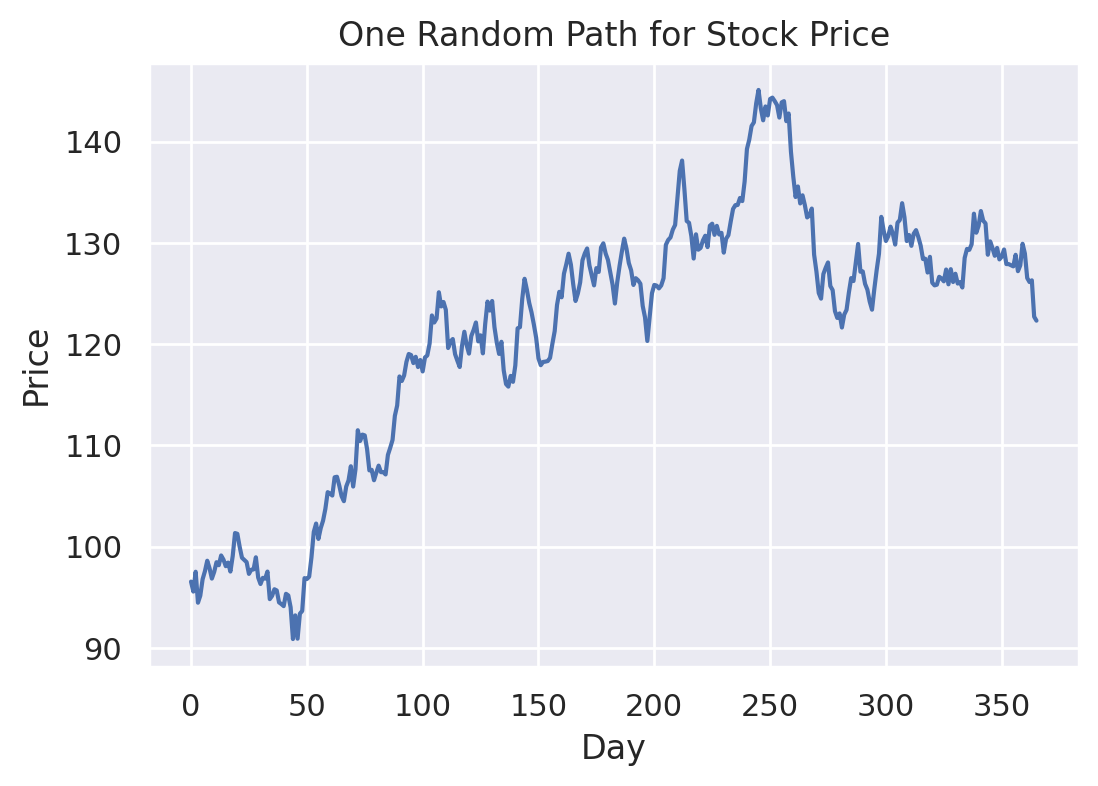

In [50]:
sns.set_theme();
plt.figure(dpi = 200);
p = sns.lineplot(range(t+1), s1);
p.set_title("One Random Path for Stock Price");
p.set_xlabel("Day");
p.set_ylabel("Price");